In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [34]:
# Importing and Cleaning:

data = pd.read_excel("new_york_2013.xls", index_col = "Table 8", skiprows = [1, 2, 3, 4], skipfooter = 3)

data = data.rename(columns = {'Unnamed: 1': 'Population', 'Unnamed: 2': 'Violent_Crime', 'Unnamed: 3': 'Murder',
                       'Unnamed: 4': 'Rape_1', 'Unnamed: 5': 'Rape_2', 'Unnamed: 6': 'Robbery',
                       'Unnamed: 7': 'Agg_Assault', 'Unnamed: 8': 'Prop_Crime', 'Unnamed: 9': 'Burglary',
                       'Unnamed: 10': 'Larceny_Theft', 'Unnamed: 11': 'Vehicle_Theft', 'Unnamed: 12': 'Arson'})

data_2.head

,Population,Murder,Robbery,Prop_Crime,Cat_Murder,Cat_Robbery,Population*2
Table 8,,,,,,,
Adams Village,1861,0,0,12,False,False,3463321
Addison Town and Village,2577,0,0,24,False,False,6640929
Akron Village,2846,0,0,16,False,False,8099716
Albany,97956,8,227,4090,True,True,9595377936
Albion Village,6388,0,4,223,False,True,40806544
Alfred Village,4089,0,3,46,False,True,16719921
Allegany Village,1781,0,0,10,False,False,3171961
Amherst Town,118296,1,31,2118,True,True,13993943616
Amityville Village,9519,0,4,210,False,True,90611361


In [38]:
# Feature Engineering: (Also had to manipulate data_2 a bit because of a 'copy error')

data_2 = pd.DataFrame(data[['Population', 'Murder', 'Robbery', 'Prop_Crime']])


data_2['Cat_Murder'] = data_2.Murder > 0
data_2['Cat_Robbery'] = data_2.Robbery > 0
data_2['Population*2'] = data_2.Population**2

data_2 = data_2.loc[data_2["Population"] < 1000000]

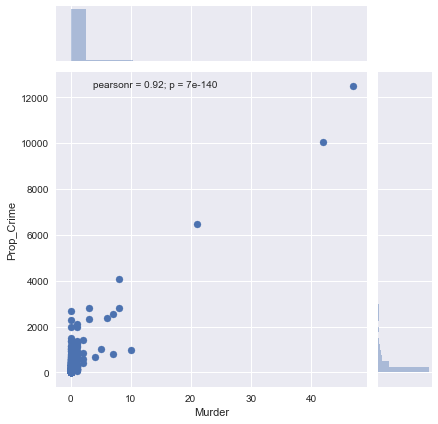

In [39]:
# # Lookin' around for outliers:

# data_2.describe()
# data_2.shape

sns.jointplot(x = 'Murder', y = 'Prop_Crime', data = data_2)

In [5]:
categoricals = data_2[['Cat_Murder', 'Cat_Robbery']]

/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


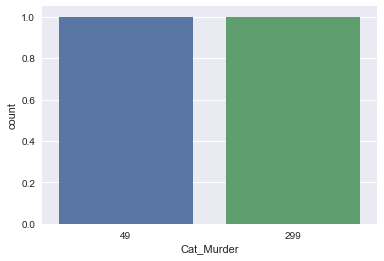

In [6]:
sns.countplot(categoricals.Cat_Murder.value_counts())

/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


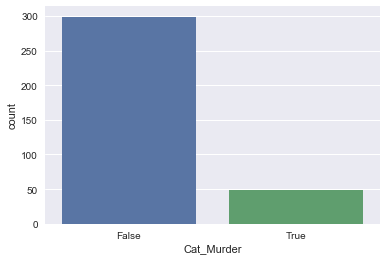

In [17]:
sns.countplot(x = 'Cat_Murder', data = categoricals)

/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


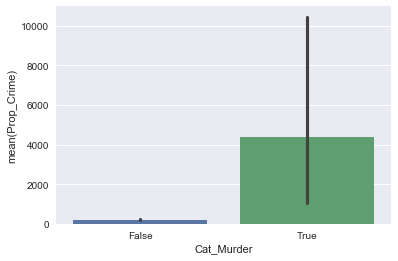

In [20]:
sns.barplot(x = 'Cat_Murder', y = 'Prop_Crime', data = data_2)

/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


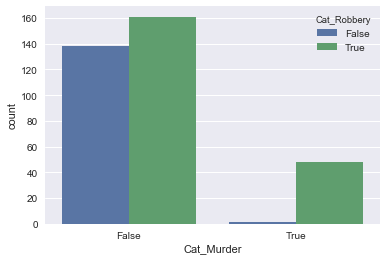

In [27]:
sns.countplot(x = 'Cat_Murder', hue = 'Cat_Robbery', data = data_2)

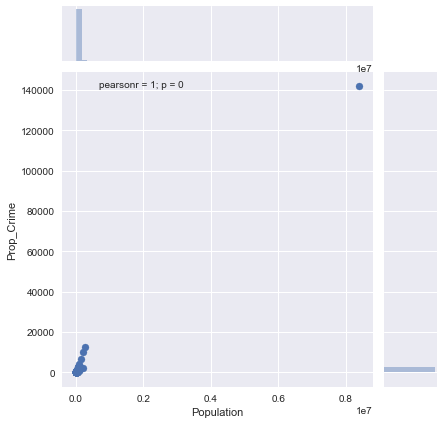

In [32]:
sns.jointplot(x = "Population", y = 'Prop_Crime', data = data_2)

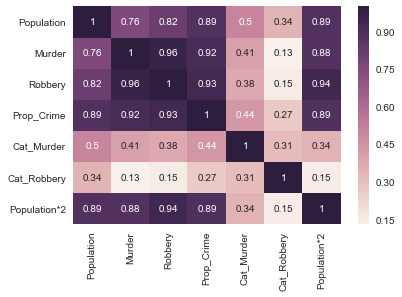

In [41]:
sns.heatmap(data_2.corr(), annot = True)

In [46]:
data_2['m_rate'] = (data_2.Murder / data_2.Population)*10000

In [47]:
data_2

,Population,Murder,Robbery,Prop_Crime,Cat_Murder,Cat_Robbery,Population*2,m_rate
Table 8,,,,,,,,
Adams Village,1861,0,0,12,False,False,3463321,0.000000
Addison Town and Village,2577,0,0,24,False,False,6640929,0.000000
Akron Village,2846,0,0,16,False,False,8099716,0.000000
Albany,97956,8,227,4090,True,True,9595377936,0.816693
Albion Village,6388,0,4,223,False,True,40806544,0.000000
Alfred Village,4089,0,3,46,False,True,16719921,0.000000
Allegany Village,1781,0,0,10,False,False,3171961,0.000000
Amherst Town,118296,1,31,2118,True,True,13993943616,0.084534
Amityville Village,9519,0,4,210,False,True,90611361,0.000000
